In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sns
import pandas_profiling 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime

In [16]:
import os
import sys

In [14]:
path=('/home/manikanta/Documents/pandas/novel-corona-virus-2019-dataset')
all_files=glob.glob(path+"/*.csv")
li=[]
for filename in all_files:
        df=pd.read_csv(filename,index_col=None,header=0)
        li.append(df)
frame=pd.concat(li,axis=0,ignore_index=True,sort=False)
frame


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,death,recovered,symptom,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1.0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
20238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
20239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
20240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
recoverd=pd.read_csv('/home/manikanta/Documents/pandas/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')

In [20]:
conformed=pd.read_csv('/home/manikanta/Documents/pandas/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')

In [21]:
deaths=pd.read_csv('/home/manikanta/Documents/pandas/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

In [22]:
recoverd.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153


In [23]:
conformed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395


In [24]:
deaths.tail(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
74,NaN,Egypt,26.8206,30.8025,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,NaN,Iran,32.4279,53.6880,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [27]:
cols1=conformed.keys()
cols1

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20'],
      dtype='object')

In [28]:
cols2=recoverd.keys()
cols2

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20'],
      dtype='object')

In [29]:
cols3=deaths.keys()
cols3

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20'],
      dtype='object')

In [33]:
conformed1=conformed.loc[:,cols[4]:cols[-1]]
conformed1.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,1,9,15,39,60,70,106,152,200,237,...,860,889,910,934,950,962,973,982,986,987
1,14,22,36,41,68,80,91,111,114,139,...,342,352,366,372,375,380,381,387,393,395
2,6,9,27,57,75,110,132,147,182,211,...,505,518,529,537,544,551,553,555,560,567
3,1,5,10,18,35,59,80,84,101,120,...,267,272,279,281,285,287,290,292,293,293
4,0,2,2,4,7,14,19,24,26,29,...,86,87,90,90,90,90,91,91,91,91


In [34]:
deaths1=deaths.loc[:,cols3[4]:cols[-1]]
deaths1.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,0,0,0,0,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,0,0,0,0,0,1,1,1,1,1,...,3,3,3,3,4,4,4,4,4,4


In [35]:
recoverd1=recoverd.loc[:,cols2[4]:cols[-1]]
recoverd1.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,0,0,0,0,0,0,0,2,2,3,...,105,127,157,193,221,255,280,361,413,474
1,0,0,1,2,2,2,4,4,4,5,...,48,56,69,80,98,108,114,122,145,153


In [36]:
dates=conformed1.keys()
world_cases=[]
total_deaths=[]
morality_rate=[]
total_recovered=[]

In [37]:
for i in dates:
    conformed_sum=conformed1[i].sum()
    death_sum=deaths1[i].sum()
    recoverd_sum=recoverd1[i].sum()
    world_cases.append(conformed_sum)
    total_deaths.append(death_sum)
    morality_rate.append(death_sum/conformed_sum)
    total_recovered.append(recoverd_sum)

In [38]:
len(world_cases),len(total_deaths),len(morality_rate),len(total_recovered)

(30, 30, 30, 30)

In [40]:
days_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [41]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29]])

In [42]:
days_in_future=3
future_forcast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)

In [43]:
future_forcast[0:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [45]:
start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forcast_dates=[]
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates=future_forcast_dates[:-3]

In [46]:
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [47]:
adjusted_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [48]:
future_forcast_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
x_trine_conformed,x_test_conformed,y_trine_conformed,y_test_conformed=train_test_split(days_since_1_22,world_cases,test_size=0.1,shuffle=False)

In [54]:
model=LinearRegression(fit_intercept=False,normalize=True)

In [55]:
model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [56]:
model.fit(x_trine_conformed,y_trine_conformed)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [58]:
trine_score=model.score(x_trine_conformed,y_trine_conformed)
trine_score

0.8901705664460757

In [59]:
test_score=model.score(x_test_conformed,y_test_conformed)
test_score

-453.98405572725255

In [60]:
test_linear_pred=model.predict(x_test_conformed)

In [61]:
linear_pred=model.predict(future_forcast)
linear_pred

array([[    0.        ],
       [ 2376.41557813],
       [ 4752.83115627],
       [ 7129.2467344 ],
       [ 9505.66231253],
       [11882.07789066],
       [14258.4934688 ],
       [16634.90904693],
       [19011.32462506],
       [21387.74020319],
       [23764.15578133],
       [26140.57135946],
       [28516.98693759],
       [30893.40251572],
       [33269.81809386],
       [35646.23367199],
       [38022.64925012],
       [40399.06482825],
       [42775.48040639],
       [45151.89598452],
       [47528.31156265],
       [49904.72714078],
       [52281.14271892],
       [54657.55829705],
       [57033.97387518],
       [59410.38945331],
       [61786.80503145],
       [64163.22060958],
       [66539.63618771],
       [68916.05176584],
       [71292.46734398],
       [73668.88292211],
       [76045.29850024]])

In [62]:
model.coef_

array([[2376.41557813]])

In [63]:
model.intercept_

0.0

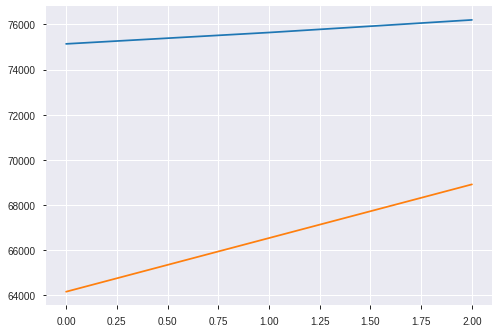

In [65]:
import matplotlib.pyplot as plt
plt.plot(y_test_conformed)
plt.plot(test_linear_pred)

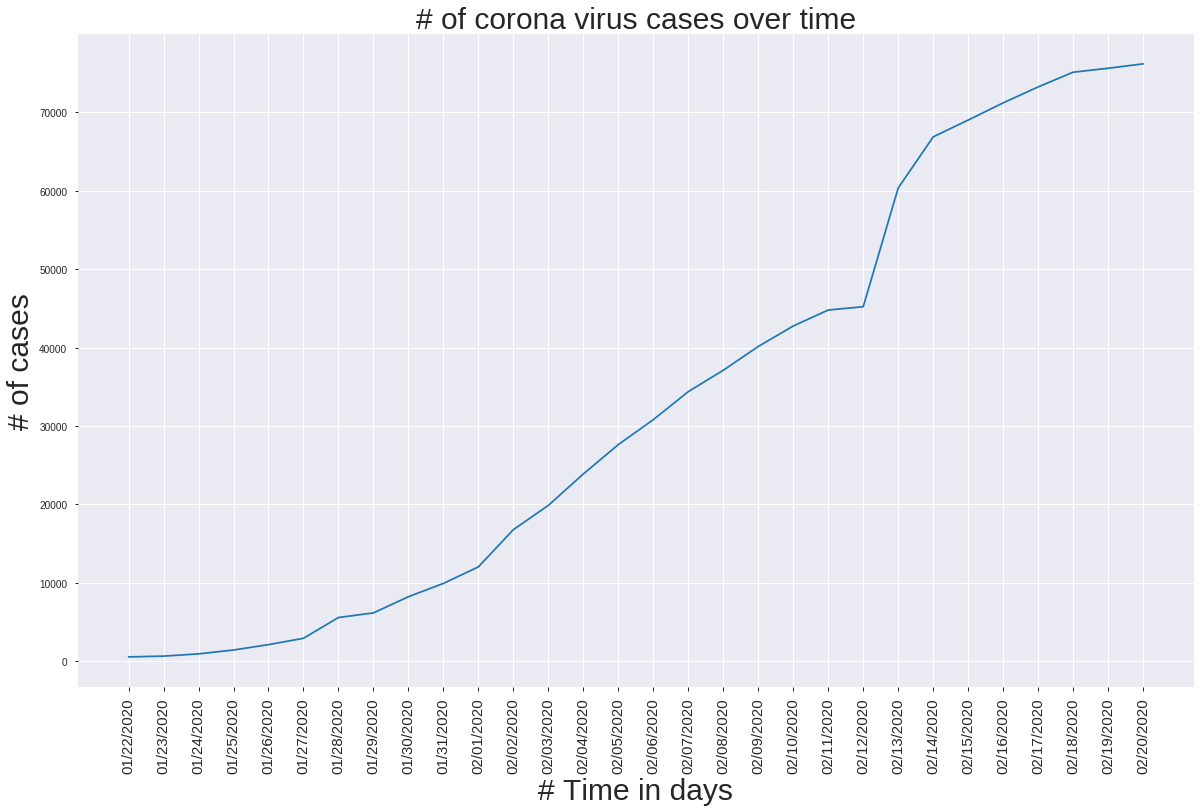

In [66]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.title('# of corona virus cases over time',size=30)
plt.xlabel('# Time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.xticks(rotation=90,size=15)
plt.show()

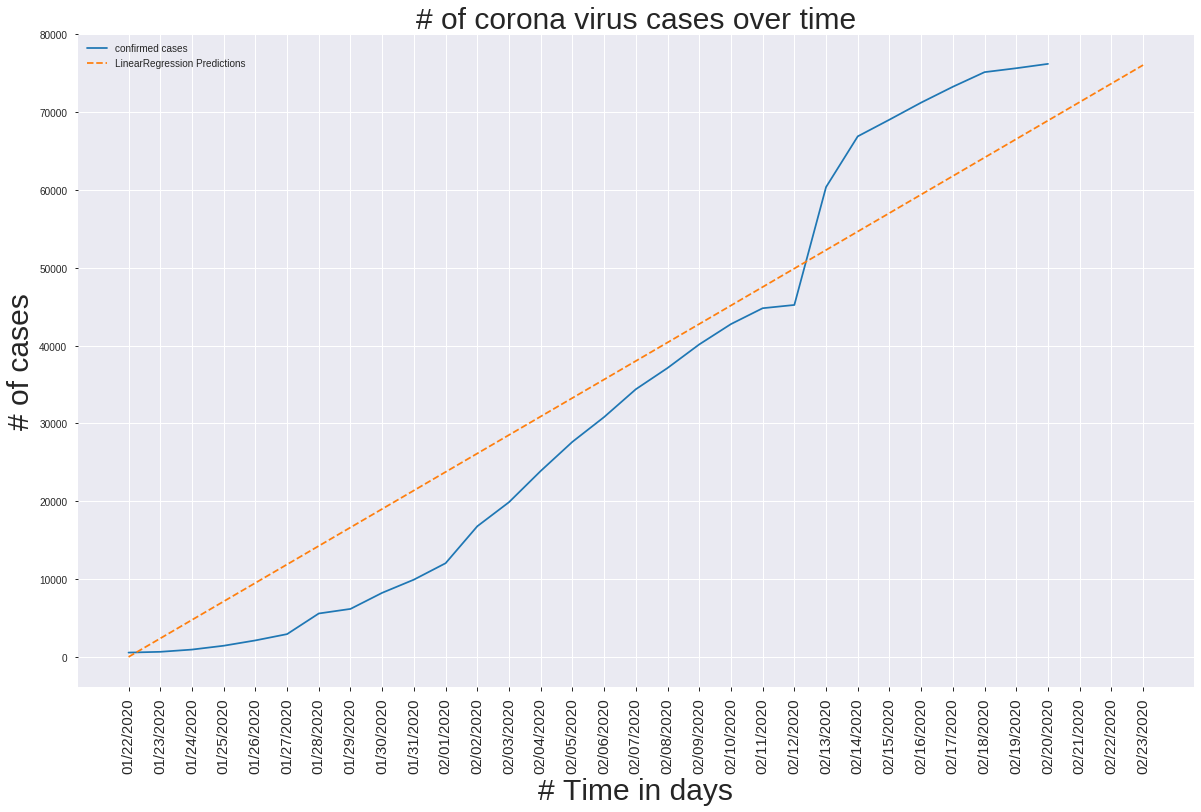

In [67]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forcast_dates,linear_pred,linestyle='dashed')
plt.title('# of corona virus cases over time',size=30)
plt.xlabel('# Time in days',size=30)
plt.ylabel('# of cases',size=30)
plt.legend(['confirmed cases','LinearRegression Predictions'])
plt.xticks(rotation=90,size=15)
plt.show()

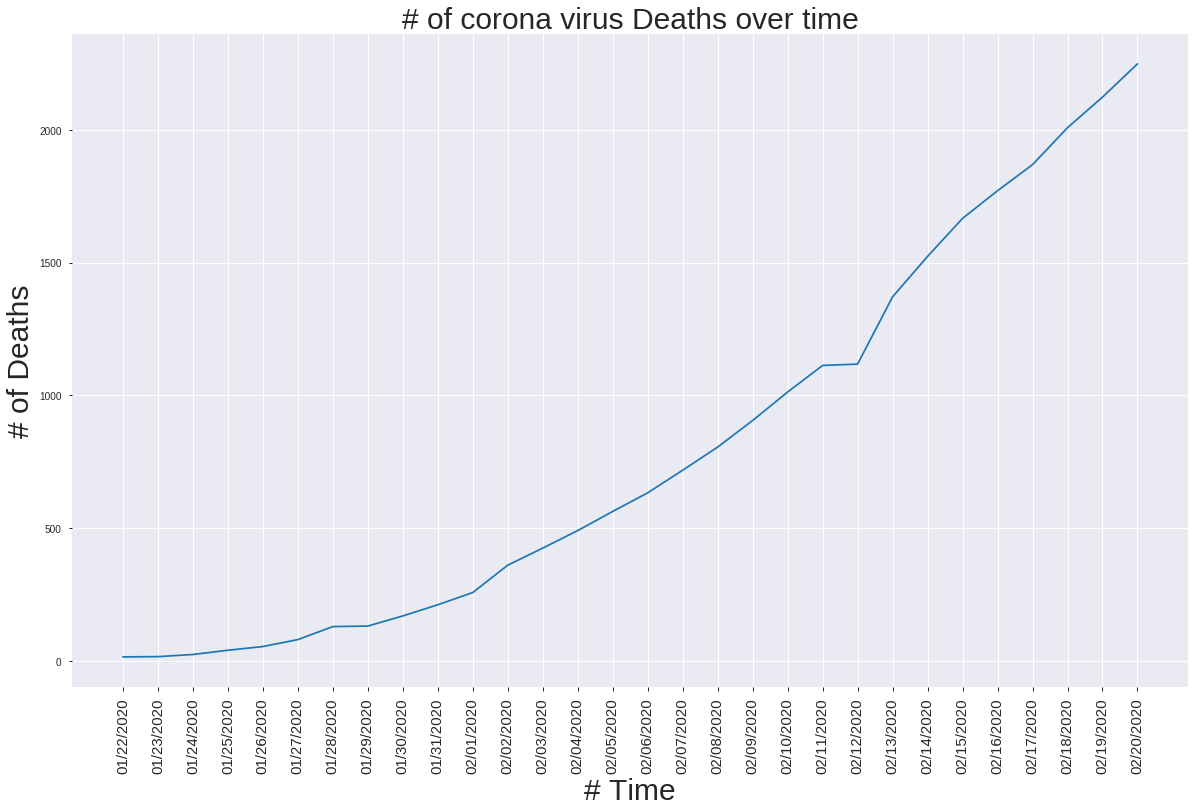

In [68]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_deaths)
plt.title('# of corona virus Deaths over time',size=30)
plt.xlabel('# Time',size=30)
plt.ylabel('# of Deaths',size=30)
plt.xticks(rotation=90,size=15)
plt.show()

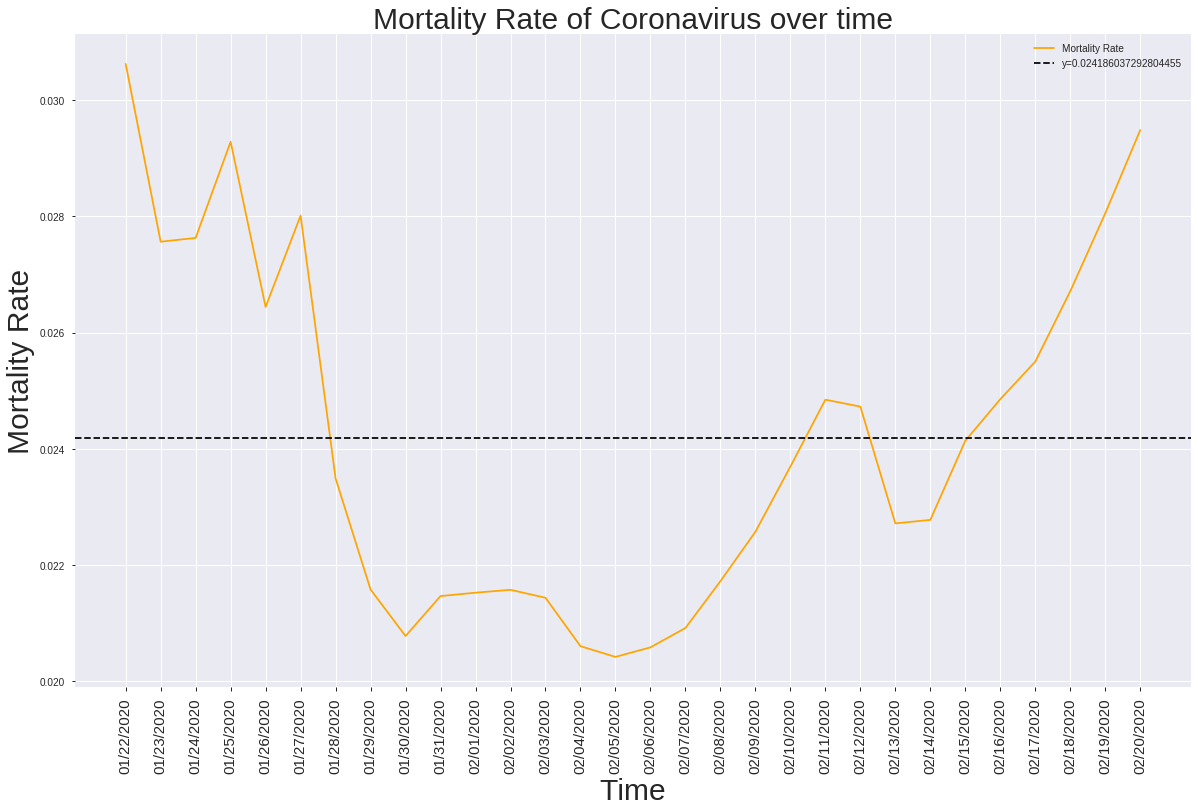

In [74]:
mean_mortality_rate=np.mean(morality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,morality_rate,color='orange')
plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')
plt.title('Mortality Rate of Coronavirus over time',size=30)
plt.legend(['Mortality Rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time',size=30)
plt.ylabel('Mortality Rate',size=30)
plt.xticks(rotation=90,size=15)
plt.show()